# Numpy Stats. Основные статистики

In [1]:
import numpy as np

In [3]:
# найти индекс самого большого элемента в массиве

arr = np.array([1, 5, 3, 4, 8, 2, 1, 5])

In [4]:
max(arr)

8

In [5]:
m = max(arr)
ind = -1
for i in range(arr.shape[0]):
    if arr[i] == m:
        ind = i
        break

In [6]:
ind

4

In [7]:
# в математике это argmax

np.argmax(arr)

4

In [8]:
# минимум

np.argmin(arr)

0

In [10]:
# многомерная операция

arr = np.arange(16).reshape(-1, 4)[::-1]
arr

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [11]:
np.argmin(arr)

12

In [12]:
np.argmin(arr, axis = 0)  # будет выполнено по столбцам

array([3, 3, 3, 3], dtype=int32)

In [13]:
np.argmin(arr, axis = 1) # по строкам

array([0, 0, 0, 0], dtype=int32)

In [14]:
# просто минимальное и максимальнео значения: np.amin/np.amax

np.amin(arr)

0

In [15]:
np.amax(arr)

15

In [16]:
np.amin(arr, axis = 0)

array([0, 1, 2, 3])

In [17]:
np.amin(arr, axis = 1)

array([12,  8,  4,  0])

In [18]:
# отступление inf и nan 

nan_inf_arr = np.array([1, 2, np.inf, 4, 5, np.nan, 7, 8, np.nan])
nan_inf_arr

array([ 1.,  2., inf,  4.,  5., nan,  7.,  8., nan])

In [19]:
np.amin(nan_inf_arr)

nan

In [20]:
np.isinf(nan_inf_arr) # на  каких позициях inf

array([False, False,  True, False, False, False, False, False, False])

In [21]:
np.isnan(nan_inf_arr)  # на каких позициях nan 

array([False, False, False, False, False,  True, False, False,  True])

In [22]:
np.amax(nan_inf_arr)

nan

In [23]:
np.nanmax(nan_inf_arr)

inf

In [24]:
np.nanmin(nan_inf_arr)

1.0

In [26]:
# посмотреть диапазон

np.ptp(arr)

15

In [27]:
np.ptp(arr, axis = 0)  # по столбцам 

array([12, 12, 12, 12])

In [28]:
np.ptp(arr, axis = 1)   # по строкам

array([3, 3, 3, 3])

Перцентиль. Квантиль

In [43]:
# как посчитать

perc = 60

array = np.random.randn(100_000)

In [45]:
array = np.sort(array)
ind = array.shape[0]*perc/100
ind = int(ind)
ind

60000

In [32]:
array[ind]

0.25609364118989997

In [33]:
from matplotlib import pyplot as plt

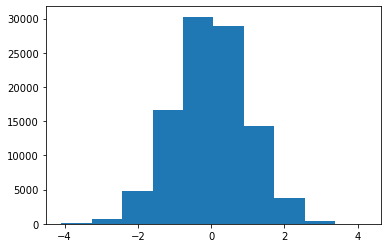

In [48]:
h = plt.hist(array)

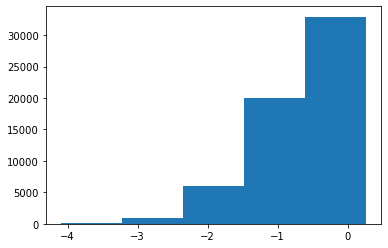

In [47]:
h = plt.hist(np.sort(array)[:ind], bins = 5)  # первые 60%

In [36]:
# вариант проще

np.quantile(array, 0.6)

0.25608715887112515

In [37]:
np.percentile(array, 60)

0.25608715887112515

In [38]:
array[0] = np.nan

In [39]:
np.percentile(array, 60)

nan

In [40]:
np.quantile(array, 0.6)

nan

In [49]:
np.nanquantile(array, 0.6)

0.25696114725492925

2. Средние, медианы, отклонения

Медиана (статистика), в математической статистике - число, характеризующее выборку (например, набор чисел). Если все элементы выборки различны, то медиана - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

In [50]:
np.median(array)

0.0017287709579898456

In [51]:
np.quantile(array, 0.5)

0.0017287709579898456

Среднее арифметическое

In [53]:
np.mean(array)

0.0004207354588733233

In [54]:
np.average(array)

0.0004207354588733233

In [55]:
# отличие average - его можно брать с весами

arr = np.arange(1, 10)
weights = 1/arr

In [56]:
np.average(arr, weights = weights )

3.181371861411138

In [57]:
s = 0 
for i,el in enumerate(arr):
    weight = weights[i]
    s += el * weight
s /= weights.sum()
s

3.181371861411138

In [58]:
# стандартное отклонение

np.std(array)

1.0022610737082887

In [59]:
np.var(array)  # дисперсия 

1.0045272598708916

Корреляции

In [60]:
a = np.arange(10)
b = a[::-1]

np.corrcoef(a, b)

array([[ 1., -1.],
       [-1.,  1.]])

In [61]:
noisy_b = b + np.random.randn(b.shape[0]) * b.std()/10  # добавление шума

In [62]:
noisy_b

array([ 8.94669936,  8.1869627 ,  6.8485126 ,  5.90481447,  5.05548895,
        4.34277857,  3.06150088,  2.28553602,  0.63275561, -0.10653657])

In [63]:
np.corrcoef(a, noisy_b)

array([[ 1.        , -0.99754652],
       [-0.99754652,  1.        ]])

In [64]:
np.corrcoef(a, b + noisy_b)

array([[ 1.        , -0.99937967],
       [-0.99937967,  1.        ]])

Задача

In [65]:
import pandas as pd

In [ ]:
marks = pd.read_csv('marks.csv').values